# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np

pfw_public = pd.read_csv('C:/Users/Erin/LaunchCode/git_hub/data-analysis-projects/the-final-project/PFW_2021_public.csv')
pfw_count_site = pd.read_csv('C:/Users/Erin/LaunchCode/git_hub/data-analysis-projects/the-final-project/PFW_count_site_data_public_2021.csv')
#imported the two .csv files I will be using
pfw = pd.merge(pfw_count_site, pfw_public, on='loc_id', how='left')
#created a merged dataframe on the 'loc_id' column 

#I also needed to get the English names for the species, so I merged a third csv that has the names, merging on the 'species_code' column as I did in checkpoint 2. 
pfw_species = pd.read_csv('C:/Users/Erin/LaunchCode/git_hub/data-analysis-projects/the-final-project/pfw_species_codes_dict.csv')
pfw = pd.merge(pfw, pfw_species, on='species_code', how='inner')   
display(pfw)

,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method,alt_full_spp_code,n_locations,scientific_name,american_english_name,taxonomy_version,taxonomic_sort_order
0,L100032,PFW_2002,0.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,85183,Junco hyemalis,Dark-eyed Junco,2022,32449
1,L100032,PFW_2002,0.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,...,1.0,1.001,0.001,PFW Web 4.0.4,NaN,40529,Zonotrichia albicollis,White-throated Sparrow,2022,32526
2,L100032,PFW_2002,0.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,...,1.0,1.001,5.000,PFW Web 4.1.4,NaN,73537,Cyanocitta cristata,Blue Jay,2022,20786
3,L100032,PFW_2002,0.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,73537,Cyanocitta cristata,Blue Jay,2022,20786
4,L100032,PFW_2002,0.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,...,1.0,1.001,15.001,PFW Web 4.1.4,NaN,73537,Cyanocitta cristata,Blue Jay,2022,20786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504980,L9994340,PFW_2021,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.001,0.000,PFW Web 4.1.4,NaN,63870,Passer domesticus,House Sparrow,2022,30886
504981,L9994340,PFW_2021,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.001,0.000,PFW Web 4.1.4,NaN,67264,Poecile atricapillus,Black-capped Chickadee,2022,21563
504982,L9994340,PFW_2021,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.001,5.000,PFW Web 4.1.4,NaN,9993,Pipilo maculatus,Spotted Towhee,2022,32713
504983,L9994340,PFW_2021,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,1500,Aphelocoma woodhouseii,Woodhouse's Scrub-Jay,2022,20805


In [2]:
# Based on my EDA, I know I need to only view rows that are True for 'valid' and 'reviewed' so that all of the sightings are confirmed as accurate by PFW. 
# I will use the same code from Checkpoint 2 to create a validated and reviewed dataframe.
pfw_VR = pfw.loc[(pfw['valid']==1.0) & (pfw['reviewed']==1.0)]
pfw_VR

,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method,alt_full_spp_code,n_locations,scientific_name,american_english_name,taxonomy_version,taxonomic_sort_order
562,L10022496,PFW_2020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.001,0.001,PFW Web 4.1.4,NaN,2782,Branta canadensis,Canada Goose,2022,319
574,L10022496,PFW_2021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.001,0.001,PFW Web 4.1.4,NaN,2782,Branta canadensis,Canada Goose,2022,319
1115,L10049673,PFW_2020,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.001,NaN,PFW Web 4.1.4,NaN,71948,Cardinalis cardinalis,Northern Cardinal,2022,33811
1130,L10049673,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.001,NaN,PFW Web 4.1.4,NaN,71948,Cardinalis cardinalis,Northern Cardinal,2022,33811
1515,L10076651,PFW_2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,78999,Zenaida macroura,Mourning Dove,2022,2405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504894,L99918,PFW_2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,2434,Pheucticus ludovicianus,Rose-breasted Grosbeak,2022,33853
504913,L99918,PFW_2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,2434,Pheucticus ludovicianus,Rose-breasted Grosbeak,2022,33853
504932,L99918,PFW_2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,2434,Pheucticus ludovicianus,Rose-breasted Grosbeak,2022,33853
504951,L99918,PFW_2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.001,0.000,PFW Web 4.1.4,NaN,2434,Pheucticus ludovicianus,Rose-breasted Grosbeak,2022,33853


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [42]:
# Checking for missing values. 
pfw_VR.isna().sum()

loc_id                     0
proj_period_id             0
yard_type_pavement       204
yard_type_garden         204
yard_type_landsca        141
                        ... 
effort_hrs_atleast         4
snow_dep_atleast         250
Data_Entry_Method          0
scientific_name            0
american_english_name      0
Length: 85, dtype: int64

In [43]:
# I want to check some specific columns for null values 
print(pfw_VR['hab_dcid_woods'].isna().sum(),
pfw_VR['yard_type_pavement'].isna().sum(),
pfw_VR['numfeeders_hanging'].isna().sum(),
pfw['population_atleast'].isna().sum())

218 204 1797 18649


In [44]:
# I want to see all the columns that contain null values so I know what I need to clean. 

with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.precision', 3):
    
    print(pfw_VR.isna().sum())


loc_id                             0
proj_period_id                     0
yard_type_pavement               204
yard_type_garden                 204
yard_type_landsca                141
yard_type_woods                  203
yard_type_desert                 204
hab_dcid_woods                   218
hab_evgr_woods                   240
hab_mixed_woods                  159
hab_orchard                      271
hab_park                         691
hab_water_fresh                  132
hab_water_salt                   271
hab_residential                  135
hab_industrial                   248
hab_agricultural                 168
hab_desert_scrub                 271
hab_young_woods                  256
hab_swamp                        605
hab_marsh                        270
evgr_trees_atleast                97
evgr_shrbs_atleast               102
dcid_trees_atleast                80
dcid_shrbs_atleast                98
fru_trees_atleast                123
cacti_atleast                    176
b

In [45]:
# I want to replace all of the empty (NaN) values with numeral 0. I will use .fillna()
pfw_VR_clean = pfw_VR.fillna(0)

with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.precision', 3):
    
    print(pfw_VR_clean.isna().sum())


loc_id                          0
proj_period_id                  0
yard_type_pavement              0
yard_type_garden                0
yard_type_landsca               0
yard_type_woods                 0
yard_type_desert                0
hab_dcid_woods                  0
hab_evgr_woods                  0
hab_mixed_woods                 0
hab_orchard                     0
hab_park                        0
hab_water_fresh                 0
hab_water_salt                  0
hab_residential                 0
hab_industrial                  0
hab_agricultural                0
hab_desert_scrub                0
hab_young_woods                 0
hab_swamp                       0
hab_marsh                       0
evgr_trees_atleast              0
evgr_shrbs_atleast              0
dcid_trees_atleast              0
dcid_shrbs_atleast              0
fru_trees_atleast               0
cacti_atleast                   0
brsh_piles_atleast              0
water_srcs_atleast              0
bird_baths_atl

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [ ]:
# I'm looking for outliers in the number of birds sighted, and I want to make sure that it is finding outliers by species. 
# I will create a function to flag outliers grouped by species.
# to make sure that this follows best practices for scientific data like this dataset, I am defining the typical low and typical high quartiles, the interquartile range, and the upper outlier threshold
# I then flag outliers using the .gt() method to check for values greater than the upper limit.

def flag_outliers(group):
    q1 = group['how_many'].quantile(0.25) # 25th percentile for typical low
    q3 = group['how_many'].quantile(0.75) # 75th percentile for typical high
    interq_range = q3 - q1 # interquartile range, spread of middle 50%
    upper = q3 + 1.5 * interq_range

    return group.assign(is_outlier=group['how_many'].gt(upper))

# I will then make a dataframe that applies the function to each species

pfw_outliers = (
    pfw_VR.groupby('american_english_name', group_keys=False)
    .apply(flag_outliers)
)

pfw_outliers[pfw_outliers['is_outlier']]

# I can see that 137 rows (sightings) contain outliers. 
# The new column 'is_outlier' is a good flag for sightings that may skew the data. I don't want to delete any data in case the sighting is accurate, but I like to added column as a check. 

C:\Users\Erin\AppData\Local\Temp\ipykernel_2980\1736065270.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_outliers)


,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method,scientific_name,american_english_name,is_outlier
562,L10022496,PFW_2020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose,True
574,L10022496,PFW_2021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose,True
7589,L10172360,PFW_2020,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.001,5.000,PFW Web 4.1.4,Turdus migratorius,American Robin,True
7601,L10172360,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.001,5.000,PFW Web 4.1.4,Turdus migratorius,American Robin,True
40157,L1059850,PFW_2011,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,4.001,NaN,PFW Web 4.1.4,Spinus pinus,Pine Siskin,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426950,L73022,PFW_2020,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,8.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal,True
426965,L73022,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,8.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal,True
470023,L8134402,PFW_2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Calypte anna,Anna's Hummingbird,True
470024,L8134402,PFW_2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Calypte anna,Anna's Hummingbird,True


In [ ]:
# I want to view the outliers as a table with the American English name and the location id, as well as how many birds were sighted. 

outlier_table = pfw_outliers.loc[
    pfw_outliers['is_outlier'], 
    ['loc_id', 'is_outlier', 'american_english_name', 'how_many']
].sort_values(by='how_many', ascending=False)

outlier_table.head(20)

# I will continue referring to the 'is_outlier' column as a flag to check for outliers without removing any data. 

,loc_id,is_outlier,american_english_name,how_many
102952,L139685,True,Pine Siskin,200.0
102959,L139685,True,Pine Siskin,200.0
102966,L139685,True,Pine Siskin,200.0
40177,L1059850,True,Pine Siskin,116.0
40162,L1059850,True,Pine Siskin,116.0
40182,L1059850,True,Pine Siskin,116.0
40172,L1059850,True,Pine Siskin,116.0
40167,L1059850,True,Pine Siskin,116.0
40157,L1059850,True,Pine Siskin,116.0
40192,L1059850,True,Pine Siskin,116.0


In [ ]:
# I thought it would also be useful to visualize the outliers. 
# I will use two visualizations: a box plot for the top species and outlier frequency by species
import matplotlib.pyplot as plt


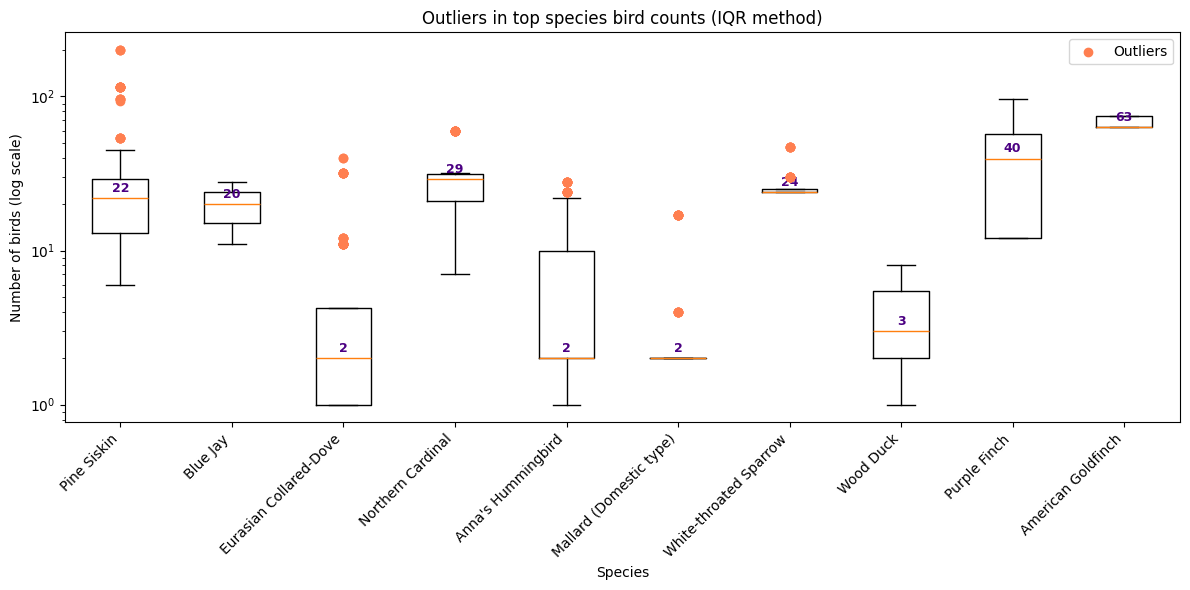

In [141]:
# box plot for top species

top_species = pfw_outliers['american_english_name'].value_counts().head(10).index # defining the top species
plot_df = pfw_outliers[pfw_outliers['american_english_name'].isin(top_species)] # creating a dataframe to use for the box plot

top_sp_data = [plot_df[plot_df['american_english_name'] == sp]['how_many'].values
                for sp in top_species] # creating a list of arrays by species

plt.figure(figsize=(12,6))

box = plt.boxplot(top_sp_data, tick_labels=top_species, showfliers=False) #creating the box plot

# creating an overlay for outliers flagged with the 'is_outlier' column
for i, sp in enumerate(top_species):
    sp_data = plot_df[(plot_df['american_english_name'] == sp) & (plot_df['is_outlier'])]
    plt.scatter(
        np.full_like(sp_data['how_many'], i + 1), 
        sp_data['how_many'], 
        color='coral', 
        label='Outliers' if i == 0 else "",
        zorder=5
    )

# adding median labels for readability
for i, line in enumerate(box['medians']):
    median_y = line.get_ydata()[0]
    plt.text(
        i + 1, 
        median_y * 1.05, 
        f'{median_y:.0f}', 
        ha='center',
        va='bottom', 
        fontsize=9,
        weight='demi', 
        color='indigo'
    )

plt.yscale('log')
plt.ylabel('Number of birds (log scale)')
plt.xlabel('Species')
plt.xticks(rotation=45, ha='right')
plt.title('Outliers in top species bird counts (IQR method)')
plt.legend()
plt.tight_layout()
plt.show()

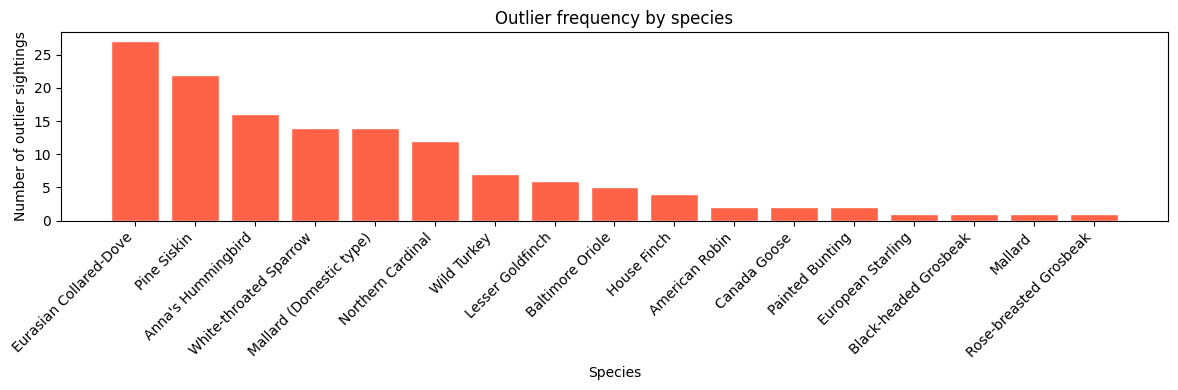

In [130]:
# outlier frequency by species

outliers_only = pfw_outliers[pfw_outliers['is_outlier']]

freq_summary = outliers_only.groupby('american_english_name').size().sort_values(ascending=False)

plt.figure(figsize=(12,4))
plt.bar(freq_summary.index, freq_summary.values, color='tomato', edgecolor='white')
plt.ylabel('Number of outlier sightings')
plt.xlabel('Species')
plt.title('Outlier frequency by species')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# There may also be outliers in the numbers of feeders, as some rows listing dozens of feeders.
# I want to check the average number of feeders for each type and then find outliers 
feeder_cols = [
    'numfeeders_suet',
    'numfeeders_ground',
    'numfeeders_hanging',
    'numfeeders_platfrm',
    'numfeeders_humming',
    'numfeeders_water',
    'numfeeders_thistle',
    'numfeeders_fruit',
    'numfeeders_hopper',
    'numfeeders_tube',
    'numfeeders_other'
]

feeder_means = pfw_VR[feeder_cols].mean().sort_values(ascending=False)

feeder_means

# It seems like on average, there are not more than 3 feeders for any given feeder type. Most sightings only have 1-2 feeders per type. 

numfeeders_hanging    3.054622
numfeeders_tube       2.596176
numfeeders_suet       1.921990
numfeeders_hopper     1.648649
numfeeders_ground     1.424342
numfeeders_thistle    1.154589
numfeeders_platfrm    1.134925
numfeeders_humming    1.026486
numfeeders_other      0.784107
numfeeders_water      0.712389
numfeeders_fruit      0.224224
dtype: float64

In [ ]:
# I now want to identify rows that have outliers of number of feeders, based on the average number of feeders for each type. 
feeder_outliers = {}

for col in feeder_cols:
    q1 = pfw_VR[col].quantile(0.25)
    q3 = pfw_VR[col].quantile(0.75)
    interq_range = q3 - q1
    upper = q3 + 1.5 * interq_range

    feeder_outliers[col] = pfw_VR.loc[
        pfw_VR[col] > upper, # filtering rows to only outlier feeder counts
        ['loc_id', 'obs_id', col]
    ].assign(feeder_type=col).rename(columns=lambda c: 'num_feeders' if c in feeder_cols else c)  # creating a column for the number of feeders 

feeder_outlier_table = (
    pd.concat(feeder_outliers.values(), ignore_index=True)
).sort_values(by='num_feeders', ascending=False)

feeder_outlier_table

# This loop identifies outliers within each feeder type, and then creates a column showing the number of feeders 
# The table then shows the location id, the observation id, the number of feeders listed for the sighting, and the type of feeder. 

,loc_id,obs_id,num_feeders,feeder_type
66,L1849044,OBS1080311770,45.0,numfeeders_suet
553,L1804747,OBS1119040077,20.0,numfeeders_humming
551,L1804747,OBS1119040077,20.0,numfeeders_humming
451,L466196,OBS1064413693,18.0,numfeeders_platfrm
457,L466196,OBS1064413693,18.0,numfeeders_platfrm
...,...,...,...,...
910,L352226,OBS1060501374,1.0,numfeeders_fruit
819,L1804747,OBS1119040077,1.0,numfeeders_fruit
820,L1804747,OBS1119040077,1.0,numfeeders_fruit
821,L1806342,OBS1056141128,1.0,numfeeders_fruit


In [114]:
pfw_outliers.head()

,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method,scientific_name,american_english_name,is_outlier
562,L10022496,PFW_2020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose,True
574,L10022496,PFW_2021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose,True
1115,L10049673,PFW_2020,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal,False
1130,L10049673,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal,False
1515,L10076651,PFW_2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Zenaida macroura,Mourning Dove,False


In [115]:
# I want to create a new column that flags if a sighting has an outlier number of feeders.
# I will add this column to the pfw_outliers dataframe for easy reference when looking at all outliers. 
pfw_outliers['feeder_outlier'] = pfw_VR['obs_id'].isin(feeder_outlier_table['obs_id'])

pfw_outliers.head()

,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method,scientific_name,american_english_name,is_outlier,feeder_outlier
562,L10022496,PFW_2020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose,True,False
574,L10022496,PFW_2021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose,True,False
1115,L10049673,PFW_2020,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal,False,True
1130,L10049673,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal,False,True
1515,L10076651,PFW_2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Zenaida macroura,Mourning Dove,False,True


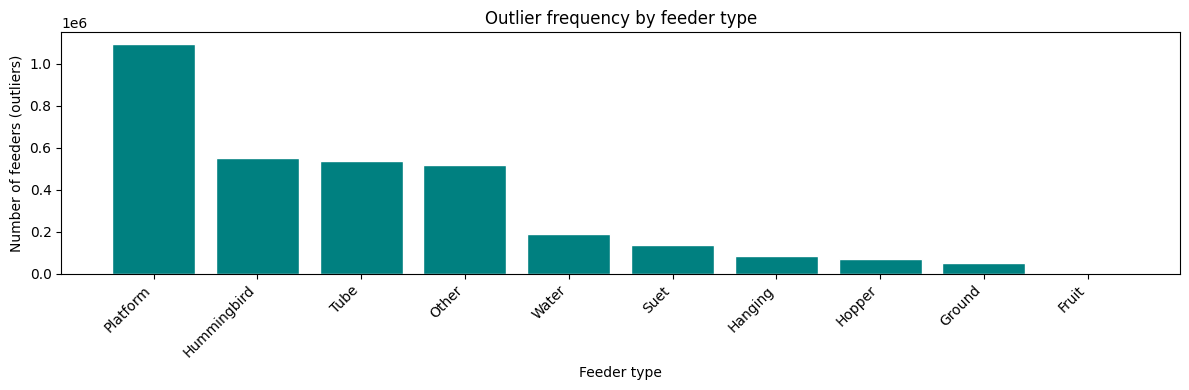

In [150]:
# I will create a similar bar plot for feeder outliers
# First I have to add the information from my feeder_outliers_table to the to pfw_outliers dataframe, which I will do using .merge()


feeder_info = feeder_outlier_table[['obs_id', 'num_feeders', 'feeder_type']].drop_duplicates(subset='obs_id')

pfw_outliers = pfw_outliers.merge(
    feeder_info, 
    on='obs_id',
    how='inner'
)

pfw_outliers['num_feeders'] = pfw_outliers['num_feeders'].fillna(0)

# I then need to define the data I want to plot 
feeder_outs_only = pfw_outliers[pfw_outliers['feeder_outlier']]

summary = feeder_outs_only.groupby('feeder_type')['num_feeders'].sum().sort_values(ascending=False)

feeder_name_map = {
    'numfeeders_suet': 'Suet',
    'numfeeders_ground': 'Ground',
    'numfeeders_hanging': 'Hanging',
    'numfeeders_platfrm': 'Platform',
    'numfeeders_humming': 'Hummingbird',
    'numfeeders_water': 'Water',
    'numfeeders_thistle': 'Thistle',
    'numfeeders_fruit': 'Fruit',
    'numfeeders_hopper': 'Hopper',
    'numfeeders_tube': 'Tube',
    'numfeeders_other': 'Other'
}

feeder_type_labels = [feeder_name_map.get(ft, ft) for ft in summary.index]

# Now I will create the bar plot

# outlier frequency for number of feeders
plt.figure(figsize=(12,4))
plt.bar(feeder_type_labels, summary.values, color='teal', edgecolor='white')
plt.ylabel('Number of feeders (outliers)')
plt.xlabel('Feeder type')
plt.title('Outlier frequency by feeder type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [3]:
# There are several columns from the 'pfw_species_codes_dict.csv' that are not necessary, so I will drop them. 
pfw_VR = pfw_VR.drop(columns=['alt_full_spp_code','n_locations', 'taxonomy_version', 'taxonomic_sort_order'])
pfw_VR

,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method,scientific_name,american_english_name
562,L10022496,PFW_2020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose
574,L10022496,PFW_2021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.001,0.001,PFW Web 4.1.4,Branta canadensis,Canada Goose
1115,L10049673,PFW_2020,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal
1130,L10049673,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.001,NaN,PFW Web 4.1.4,Cardinalis cardinalis,Northern Cardinal
1515,L10076651,PFW_2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Zenaida macroura,Mourning Dove
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504894,L99918,PFW_2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Pheucticus ludovicianus,Rose-breasted Grosbeak
504913,L99918,PFW_2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Pheucticus ludovicianus,Rose-breasted Grosbeak
504932,L99918,PFW_2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Pheucticus ludovicianus,Rose-breasted Grosbeak
504951,L99918,PFW_2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.001,0.000,PFW Web 4.1.4,Pheucticus ludovicianus,Rose-breasted Grosbeak


In [ ]:
# Several columns have binary data and can be combined into a single column. 
# I will combine the yard type columns, the habitat (hab) columns, the months (fed_in_) columns, and the animals (squirrels, cats, dogs, humans) columns

#yard type combo

# Creating a "clean" dataframe so that I don't change the data in pfw_VR
pfw_clean = pfw_VR.copy()
 


In [11]:
# Creating a dictionary to rename the yard type columns

yard_cols = {
    'yard_type_pavement': 'pavement', 
    'yard_type_garden': 'garden', 
    'yard_type_landsca': 'landscape', 
    'yard_type_woods': 'woods', 
    'yard_type_desert': 'desert'

}

# I also need other columns for analysis, such as 'loc_id', 'american_english_name', and 'how_many' 
# I will create a list of these columns to use with .melt()

id_cols = [
    'loc_id', 
    'obs_id', 
    'proj_period_id',
    'american_english_name', 
    'how_many'
]

In [ ]:
# Using .melt(), I will change the multiple binary columns into a long format

yard_long = (
    pfw_clean.melt(
        id_vars=id_cols, 
        value_vars=list(yard_cols.keys()), 
        var_name='yard_type', 
        value_name='present'
    )
)

# I will use the value name 'present' to keep only the 1 (True) variables in the yard types, and I will keep the clean labels with .map()

yard_long = yard_long[yard_long['present'] == 1]
yard_long['yard_type'] = yard_long['yard_type'].map(yard_cols)

yard_long

#I can see that there are some duplicates in this dataframe, such as the Black-throated Gray Warbler and the Cactus Wren
# I want to explore what yard types have the most unique species (species richness), so I will drop the duplicates 


,loc_id,obs_id,proj_period_id,american_english_name,how_many,yard_type,present
265,L132193,OBS1049475224,PFW_2016,Lesser Goldfinch,51.0,pavement,1.0
1938,L8134402,OBS1065755134,PFW_2019,Anna's Hummingbird,24.0,pavement,1.0
2149,L1082408,OBS1089147328,PFW_2011,Black-throated Gray Warbler,1.0,garden,1.0
2151,L1082408,OBS1089147328,PFW_2017,Black-throated Gray Warbler,1.0,garden,1.0
2152,L1082408,OBS1089147328,PFW_2018,Black-throated Gray Warbler,1.0,garden,1.0
...,...,...,...,...,...,...,...
9009,L2453190,OBS1061328582,PFW_2020,Cactus Wren,1.0,desert,1.0
9010,L2453190,OBS1061328582,PFW_2021,Cactus Wren,1.0,desert,1.0
10083,L8137396,OBS1078879514,PFW_2019,Black-throated Sparrow,4.0,desert,1.0
10084,L8137396,OBS1078879514,PFW_2020,Black-throated Sparrow,4.0,desert,1.0


In [ ]:
# Further cleaning by dropping duplicates in my yard_long dataframe
yard_species = yard_long.drop_duplicates(
    subset=['yard_type', 'american_english_name']
)

yard_species
# I now have a further cleaned dataframe for the yard types 

,loc_id,obs_id,proj_period_id,american_english_name,how_many,yard_type,present
265,L132193,OBS1049475224,PFW_2016,Lesser Goldfinch,51.0,pavement,1.0
1938,L8134402,OBS1065755134,PFW_2019,Anna's Hummingbird,24.0,pavement,1.0
2149,L1082408,OBS1089147328,PFW_2011,Black-throated Gray Warbler,1.0,garden,1.0
2191,L12745718,OBS1053508777,PFW_2021,Allen's Hummingbird,3.0,garden,1.0
2862,L2410048,OBS1012565262,PFW_2014,Eurasian Collared-Dove,32.0,garden,1.0
...,...,...,...,...,...,...,...
8293,L12743590,OBS1133300980,PFW_2021,Black-headed Grosbeak,1.0,desert,1.0
8299,L12755408,OBS1127372467,PFW_2021,Lazuli Bunting,1.0,desert,1.0
8748,L1816329,OBS1031809605,PFW_2013,Orange-crowned Warbler,2.0,desert,1.0
9006,L2453190,OBS1061328582,PFW_2014,Cactus Wren,1.0,desert,1.0


In [17]:
# I can then ensure that I can count the species richness by yard type, which will be helpful for future analyses. 
species_richness = (
    yard_species.groupby('yard_type')['american_english_name']
    .nunique()
    .sort_values(ascending=False)
)

species_richness

yard_type
landscape    87
woods        82
garden        7
desert        5
pavement      2
Name: american_english_name, dtype: int64

In [ ]:
# Now I will repeat this process for the remaining binary column groups. 

# habitat columns
# Creating a dictionary to rename the columns
hab_cols = {
    'hab_dcid_woods': 'deciduous woods', 
    'hab_evgr_woods': 'evergreen woods', 
    'hab_mixed_woods': 'mixed woods', 
    'hab_orchard': 'orchard', 
    'hab_park': 'park', 
    'hab_water_fresh': 'fresh water', 
    'hab_water_salt': 'salt water', 
    'hab_residential': 'residential', 
    'hab_industrial': 'industrial', 
    'hab_agricultural': 'agricultural', 
    'hab_desert_scrub': 'desert scrub', 
    'hab_young_woods': 'young woods', 
    'hab_swamp': 'swamp', 
    'hab_marsh': 'marsh'
}

# I will use the same 'id_cols' from earlier

hab_long = (
    pfw_clean.melt(
        id_vars=id_cols, 
        value_vars=list(hab_cols.keys()), 
        var_name='hab_type', 
        value_name='present'
    )
)

# 'present' to keep only the 1 (True) variables and clean labels with .map()

hab_long = hab_long[hab_long['present'] == 1]
hab_long['hab_type'] = hab_long['hab_type'].map(hab_cols)

hab_long


,loc_id,obs_id,proj_period_id,american_english_name,how_many,hab_type,present
0,L10022496,OBS1060515782,PFW_2020,Canada Goose,110.0,deciduous woods,1.0
1,L10022496,OBS1060515782,PFW_2021,Canada Goose,110.0,deciduous woods,1.0
2,L10049673,OBS1020706158,PFW_2020,Northern Cardinal,3.0,deciduous woods,1.0
3,L10049673,OBS1020706158,PFW_2021,Northern Cardinal,3.0,deciduous woods,1.0
11,L10132396,OBS1024684281,PFW_2020,Blue Jay,14.0,deciduous woods,1.0
...,...,...,...,...,...,...,...
28478,L991606,OBS1107114522,PFW_2017,Wood Duck,8.0,marsh,1.0
28479,L991606,OBS1107114522,PFW_2018,Wood Duck,8.0,marsh,1.0
28480,L991606,OBS1107114522,PFW_2019,Wood Duck,8.0,marsh,1.0
28481,L991606,OBS1107114522,PFW_2020,Wood Duck,8.0,marsh,1.0


In [19]:
# and a cleaner version without duplicates for the habitat types
hab_species = hab_long.drop_duplicates(
    subset=['hab_type', 'american_english_name']
)

hab_species

,loc_id,obs_id,proj_period_id,american_english_name,how_many,hab_type,present
0,L10022496,OBS1060515782,PFW_2020,Canada Goose,110.0,deciduous woods,1.0
2,L10049673,OBS1020706158,PFW_2020,Northern Cardinal,3.0,deciduous woods,1.0
11,L10132396,OBS1024684281,PFW_2020,Blue Jay,14.0,deciduous woods,1.0
12,L10135428,OBS1015928504,PFW_2020,Pine Siskin,7.0,deciduous woods,1.0
23,L10154057,OBS1016253998,PFW_2021,Red-winged Blackbird,20.0,deciduous woods,1.0
...,...,...,...,...,...,...,...
28113,L6372386,OBS1027446808,PFW_2018,House Finch,21.0,marsh,1.0
28130,L6464730,OBS1063342039,PFW_2018,Common Redpoll,250.0,marsh,1.0
28332,L80418,OBS1028428191,PFW_2001,Rock Pigeon (Feral Pigeon),45.0,marsh,1.0
28354,L810172,OBS1034547101,PFW_2016,Glaucous-winged Gull,1.0,marsh,1.0


In [25]:
# other animals columns
# Creating a list of the columns, since they do not need to be renamed
animal_cols = [
    'squirrels', 
    'cats', 
    'dogs', 
    'humans'
]

# I will use the same 'id_cols' from earlier

animal_long = (
    pfw_clean.melt(
        id_vars=id_cols, 
        value_vars=animal_cols, 
        var_name='animal_type', 
        value_name='present'
    )
)

# 'present' to keep only the 1 (True) variables

animal_long = animal_long[animal_long['present'] == 1]

animal_long

,loc_id,obs_id,proj_period_id,american_english_name,how_many,animal_type,present
0,L10022496,OBS1060515782,PFW_2020,Canada Goose,110.0,squirrels,1.0
1,L10022496,OBS1060515782,PFW_2021,Canada Goose,110.0,squirrels,1.0
2,L10049673,OBS1020706158,PFW_2020,Northern Cardinal,3.0,squirrels,1.0
3,L10049673,OBS1020706158,PFW_2021,Northern Cardinal,3.0,squirrels,1.0
6,L10090343,OBS1021570684,PFW_2020,White-throated Sparrow,1.0,squirrels,1.0
...,...,...,...,...,...,...,...
8135,L99918,OBS1139331670,PFW_2017,Rose-breasted Grosbeak,4.0,humans,1.0
8136,L99918,OBS1139331670,PFW_2018,Rose-breasted Grosbeak,4.0,humans,1.0
8137,L99918,OBS1139331670,PFW_2019,Rose-breasted Grosbeak,4.0,humans,1.0
8138,L99918,OBS1139331670,PFW_2020,Rose-breasted Grosbeak,4.0,humans,1.0


In [26]:
# and a cleaner version without duplicates for the animal types
animal_species = animal_long.drop_duplicates(
    subset=['animal_type', 'american_english_name']
)

animal_species

,loc_id,obs_id,proj_period_id,american_english_name,how_many,animal_type,present
0,L10022496,OBS1060515782,PFW_2020,Canada Goose,110.0,squirrels,1.0
2,L10049673,OBS1020706158,PFW_2020,Northern Cardinal,3.0,squirrels,1.0
6,L10090343,OBS1021570684,PFW_2020,White-throated Sparrow,1.0,squirrels,1.0
8,L10124287,OBS1051519772,PFW_2020,Pine Warbler,1.0,squirrels,1.0
9,L10128133,OBS1032457085,PFW_2020,Wild Turkey,6.0,squirrels,1.0
...,...,...,...,...,...,...,...
7994,L8092102,OBS1012677790,PFW_2019,Hermit Thrush,1.0,humans,1.0
8000,L810172,OBS1034547101,PFW_2010,Glaucous-winged Gull,1.0,humans,1.0
8048,L8137396,OBS1078879514,PFW_2019,Black-throated Sparrow,4.0,humans,1.0
8082,L867166,OBS1094394535,PFW_2010,Red-whiskered Bulbul,5.0,humans,1.0


In [27]:
# Feeding months 
# I will use a dictionary because I want cleaner labels for the columns
fed_month_cols = {
    'fed_yr_round': 'Fed all year',
    'fed_in_jan': 'January',
    'fed_in_feb': 'February', 
    'fed_in_mar': 'March', 
    'fed_in_apr': 'April', 
    'fed_in_may': 'May', 
    'fed_in_jun': 'June', 
    'fed_in_jul': 'July', 
    'fed_in_aug': 'August', 
    'fed_in_sep': 'September', 
    'fed_in_oct': 'October', 
    'fed_in_nov': 'November', 
    'fed_in_dec': 'December'
    }

# I will use the same id_cols from earlier
fed_month_long = (
    pfw_clean.melt(
        id_vars=id_cols, 
        value_vars=list(fed_month_cols.keys()), 
        var_name='fed_month', 
        value_name='present'
    )
)

fed_month_long = fed_month_long[fed_month_long['present'] == 1]
fed_month_long['fed_month'] = fed_month_long['fed_month'].map(fed_month_cols)

fed_month_long

,loc_id,obs_id,proj_period_id,american_english_name,how_many,fed_month,present
0,L10022496,OBS1060515782,PFW_2020,Canada Goose,110.0,Fed all year,1.0
1,L10022496,OBS1060515782,PFW_2021,Canada Goose,110.0,Fed all year,1.0
2,L10049673,OBS1020706158,PFW_2020,Northern Cardinal,3.0,Fed all year,1.0
3,L10049673,OBS1020706158,PFW_2021,Northern Cardinal,3.0,Fed all year,1.0
4,L10076651,OBS1039136709,PFW_2020,Mourning Dove,80.0,Fed all year,1.0
...,...,...,...,...,...,...,...
26450,L99918,OBS1139331670,PFW_2017,Rose-breasted Grosbeak,4.0,December,1.0
26451,L99918,OBS1139331670,PFW_2018,Rose-breasted Grosbeak,4.0,December,1.0
26452,L99918,OBS1139331670,PFW_2019,Rose-breasted Grosbeak,4.0,December,1.0
26453,L99918,OBS1139331670,PFW_2020,Rose-breasted Grosbeak,4.0,December,1.0


In [28]:
# and a cleaner version without duplicates

fed_month_species = fed_month_long.drop_duplicates(
    subset=['fed_month', 'american_english_name']
)

fed_month_species

,loc_id,obs_id,proj_period_id,american_english_name,how_many,fed_month,present
0,L10022496,OBS1060515782,PFW_2020,Canada Goose,110.0,Fed all year,1.0
2,L10049673,OBS1020706158,PFW_2020,Northern Cardinal,3.0,Fed all year,1.0
4,L10076651,OBS1039136709,PFW_2020,Mourning Dove,80.0,Fed all year,1.0
6,L10090343,OBS1021570684,PFW_2020,White-throated Sparrow,1.0,Fed all year,1.0
11,L10132396,OBS1024684281,PFW_2020,Blue Jay,14.0,Fed all year,1.0
...,...,...,...,...,...,...,...
26310,L8092102,OBS1012677790,PFW_2020,Hermit Thrush,1.0,December,1.0
26315,L810172,OBS1034547101,PFW_2010,Glaucous-winged Gull,1.0,December,1.0
26363,L8137396,OBS1078879514,PFW_2019,Black-throated Sparrow,4.0,December,1.0
26397,L867166,OBS1094394535,PFW_2010,Red-whiskered Bulbul,5.0,December,1.0


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [41]:
# I want to make sure that the American English names of the birds are not duplicated or have close but not the same labels (such as "Northern Cardinal" and "Northern Cardinal (Common)")
# I can see that there are some names with parentheitcals, etc. that could be combined. 
# For example, there are 62 sightings of "Mallard (Domestic type)" and 5 sightings of "Mallard" which could all be counted under "Mallard". 
# There are also 94 sightings of "Northern Cardinal" and 1 sighting of "Northern Cardinal (Common)" which could all be counted under "Northern Cardinal"

with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.precision', 3):
    display(pfw_clean['american_english_name'].value_counts())

american_english_name
Pine Siskin                         243
Blue Jay                            147
Eurasian Collared-Dove              108
Northern Cardinal                    94
Anna's Hummingbird                   89
Mallard (Domestic type)              62
White-throated Sparrow               58
Wood Duck                            56
Purple Finch                         56
American Goldfinch                   54
Mourning Dove                        52
Red-winged Blackbird                 43
Gray Catbird                         40
Painted Bunting                      39
Rose-breasted Grosbeak               38
Wild Turkey                          37
Orange-crowned Warbler               34
Yellow-throated Warbler              33
Lesser Goldfinch                     31
Great Crested Flycatcher             31
Black-headed Grosbeak                30
Canada Goose                         29
White-winged Crossbill               29
Indigo Bunting                       29
Red-bellied Woodpe

In [40]:
# I will clean the name by removing parentheitcals and normalizing capitalization by creating a new clean column for the American English name

pfw_clean['american_english_name_clean'] = (
    pfw_clean['american_english_name'].str.replace(r'\s*\(.*?\)', '', regex=True)
    .str.strip()
)

with pd.option_context('display.max_rows', None, 
                       'display.max_columns', None, 
                       'display.precision', 3):
    display(pfw_clean['american_english_name_clean'].value_counts())

#I can now see that my examples of "Mallard" and "Northern Cardinal" have been combined and the sighting counts are correct. 
# There are also no longer any parentheticals, making the names easier to read and glance through


american_english_name_clean
Pine Siskin                     243
Blue Jay                        147
Eurasian Collared-Dove          108
Northern Cardinal                95
Anna's Hummingbird               89
Mallard                          67
White-throated Sparrow           58
Wood Duck                        56
Purple Finch                     56
American Goldfinch               54
Mourning Dove                    52
Red-winged Blackbird             43
Gray Catbird                     40
Painted Bunting                  39
Rose-breasted Grosbeak           38
Wild Turkey                      37
Orange-crowned Warbler           34
Yellow-throated Warbler          33
Lesser Goldfinch                 31
Great Crested Flycatcher         31
Black-headed Grosbeak            30
White-winged Crossbill           29
Canada Goose                     29
Indigo Bunting                   29
Red-bellied Woodpecker           28
Baltimore Oriole                 24
Evening Grosbeak                 23


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

Yes, there were all 4 types of dirty data in various aspects of the dataset. 

2. Did the process of cleaning your data give you new insights into your dataset?

Yes! I found some interesting results particularly looking at outliers and when using .melt() to combine the binary data columns. I feel like I came up with more analysis questions that I can explore with the cleaned data. 

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

I found it somewhat difficult to keep track of what I had cleaned and what changes I had made, so I tried to conservatively manipulate the data so that I did not lose anything. 
When making visualizations, it is challenging to determine what type of visualization will be the most effective for what you are trying to show. It is also somewhat hard to get things like number overlays to appear the way you want them to. 